<h1 style="text-align:center; font-size:20">
BIOCB 4381/6381 – Assignment 3 <br>
    <br>
Due Tuesday, November 28, 11:59 PM (via Canvas) <br>
</h1>


**IMPORTANT NOTES** 

1. Please make sure that you can run all trunks in the notebook without error message (warning messages are fine). You may test it by clicking **KERNEL** and selecting **RESTART & RUN ALL** from the drop-down menu. 

2. Please comment your code properly. 

3. For grading, more inputs in addition to the testing examples will be used to check your code. Therefore, please try to make your code correct and robust.

In [1]:
# Please do NOT modify this trunk
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load Anything else if you needed below

## Problem 1 (70 pts)

Process the `Network.txt` files using Pandas

#### (a) Load Data (5 pts)
    
The file `network.txt` contains a protein-protein interaction network from five different species, including C. Elegans, fruit flies, mice, yeast and human labeled with their taxids. Each row in the file is a pair of interacting proteins (Protein A and Protein B).

* ***Binary***: Two proteins have direct physical interactions, measured by pairwise methods
* ***Co-Complex***: Two proteins might not have direct interaction but they are from same protein complex, without pairwise determination methods.

In [51]:
df=pd.read_csv("./Network.txt",sep="\t")
df

,Uniprot_A,Uniprot_B,Gene_A,Gene_B,ORF_A,ORF_B,Alias_A,Alias_B,Type,taxid
0,A0A061ACK7,P30632,A0A061ACK7,ASNA-1,CELE_Y62E10A.13|Y62E10A.13,ZK637.5,WBGENE00013379,WBGENE00014025,Binary,6239
1,A0A061ACK7,Q21746,A0A061ACK7,SGT-1,CELE_Y62E10A.13|Y62E10A.13,CELE_R05F9.10|R05F9.10,WBGENE00013379,WBGENE00019893,Binary,6239
2,A0A061ACP8,A0A061ACP8,EPS-8,EPS-8,CELE_Y57G11C.24|Y57G11C.24,CELE_Y57G11C.24|Y57G11C.24,WBGENE00001330,WBGENE00001330,Binary,6239
3,A0A061ACP8,A0A0K3AS36,EPS-8,ITSN-1,CELE_Y57G11C.24|Y57G11C.24,CELE_Y116A8C.36|Y116A8C.36,WBGENE00001330,WBGENE00006405,Binary,6239
4,A0A061ACP8,A0A1N7SYW5,EPS-8,A0A1N7SYW5,CELE_Y57G11C.24|Y57G11C.24,CELE_F43B10.1|F43B10.1,WBGENE00001330,WBGENE00018373,Binary,6239
...,...,...,...,...,...,...,...,...,...,...
400108,Q969T4,Q6ZUS5,UBE2E3,CCDC121,NaN,NaN,HGNC:25833,HGNC:12479,Co-Complex,9606
400109,Q8IG69,Q22156,CEBP-2,ATF-4,CELE_T04C10.4|T04C10.4,C48E7.11,WBGENE00000221,WBGENE00016754,Binary,6239
400110,Q9UKG1,Q86X19,APPL1,TMEM17,NaN,NaN,HGNC:26623,HGNC:24035,Co-Complex,9606
400111,Q8TAF8,Q4LDR2,LHFPL5,CTXN3,NaN,NaN,HGNC:31110,HGNC:21253,Binary,9606


### (b) Identify Unique Protein interactions in Human (10 pts)

Like what we did in HW1, add a new column named `ppi` with the format `ProteinA:ProteinB` and determine how many unqiue protein-protein interaction human (taxid: 9606) have?

- **223011**

`Caution: ProteinA:ProteinB and ProteinB:ProteinA are the same protein-protein interaction which should be consider as one single ppi`

In [53]:
# df["ppi"]=(df["Uniprot_A"]+":"+df["Uniprot_B"])
df["ppi"]=df[["Uniprot_A", "Uniprot_B"]].apply(lambda x: sorted(x)[0], axis=1)+":"+df[["Uniprot_A", "Uniprot_B"]].apply(lambda x: sorted(x)[1], axis=1)
df

,Uniprot_A,Uniprot_B,Gene_A,Gene_B,ORF_A,ORF_B,Alias_A,Alias_B,Type,taxid,ppi
0,A0A061ACK7,P30632,A0A061ACK7,ASNA-1,CELE_Y62E10A.13|Y62E10A.13,ZK637.5,WBGENE00013379,WBGENE00014025,Binary,6239,A0A061ACK7:P30632
1,A0A061ACK7,Q21746,A0A061ACK7,SGT-1,CELE_Y62E10A.13|Y62E10A.13,CELE_R05F9.10|R05F9.10,WBGENE00013379,WBGENE00019893,Binary,6239,A0A061ACK7:Q21746
2,A0A061ACP8,A0A061ACP8,EPS-8,EPS-8,CELE_Y57G11C.24|Y57G11C.24,CELE_Y57G11C.24|Y57G11C.24,WBGENE00001330,WBGENE00001330,Binary,6239,A0A061ACP8:A0A061ACP8
3,A0A061ACP8,A0A0K3AS36,EPS-8,ITSN-1,CELE_Y57G11C.24|Y57G11C.24,CELE_Y116A8C.36|Y116A8C.36,WBGENE00001330,WBGENE00006405,Binary,6239,A0A061ACP8:A0A0K3AS36
4,A0A061ACP8,A0A1N7SYW5,EPS-8,A0A1N7SYW5,CELE_Y57G11C.24|Y57G11C.24,CELE_F43B10.1|F43B10.1,WBGENE00001330,WBGENE00018373,Binary,6239,A0A061ACP8:A0A1N7SYW5
...,...,...,...,...,...,...,...,...,...,...,...
400108,Q969T4,Q6ZUS5,UBE2E3,CCDC121,NaN,NaN,HGNC:25833,HGNC:12479,Co-Complex,9606,Q6ZUS5:Q969T4
400109,Q8IG69,Q22156,CEBP-2,ATF-4,CELE_T04C10.4|T04C10.4,C48E7.11,WBGENE00000221,WBGENE00016754,Binary,6239,Q22156:Q8IG69
400110,Q9UKG1,Q86X19,APPL1,TMEM17,NaN,NaN,HGNC:26623,HGNC:24035,Co-Complex,9606,Q86X19:Q9UKG1
400111,Q8TAF8,Q4LDR2,LHFPL5,CTXN3,NaN,NaN,HGNC:31110,HGNC:21253,Binary,9606,Q4LDR2:Q8TAF8


In [58]:
len(df[df["taxid"]==9606]["ppi"].unique())

223011

### (c) Generate a Network for Binary interactions for human (10 pts)

Please filter out all the binary interactions for human and create a network (an undirected graph) called `interactome_binary`

* Using `nx.from_pandas_edgelist`
* Using `Uniport_A` as your source and `Uniport_B` as target

In [85]:
# Typo for source and target name, which caused me stuck me for 10 minutes
dfhb=df[(df["taxid"]==9606 )&(df["Type"]=="Binary")]
# dfhb
interactome_binary=nx.graph
interactome_binary=nx.from_pandas_edgelist(dfhb,'Uniprot_A','Uniprot_B')

In [134]:
#nx.is_connected(interactome_binary)

### (d) Find the Node with Maximum Degree in the Graph and Calculate its degree centrality (15 pts)

Please find the node with the maximum degree in the `interactome_binary` you just generated and calculate its degree centrality

* Using `nx.degree_centrality` for calculation

Question: What is the uniport ID for this node? How many edges it has? What is its degree centrality?
|Uniprot ID|Num. of edges|Degree centrality|
|---|---|---|
|**P42858**|**848**|**0.060863**|

In [111]:
pd.DataFrame(nx.degree_centrality(interactome_binary).values(),index=nx.degree_centrality(interactome_binary).keys(),columns=["degree_centrality"])\
    .sort_values("degree_centrality",ascending=False).iloc[0]

degree_centrality    0.060863
Name: P42858, dtype: float64

In [142]:
interactome_binary.degree("P42858")

848

### (e) Generate a subgraph of VHL (Uniport ID: P40337) and Draw the Network Plot (30 pts)

There are general two ways to do this: 1) from a list of Nodes 2) from a list of Edges; you can choose either way to do it.

After you generated the subgraph, please use `nx.draw_networkx` to draw the network plot with setting `seed=1` in the `pos` parameter.

Lastly, you will output a `.csv` file that only filter out `VHL(P40337)` (Keep both `Co-Complex` and `Binary`) to draw a publish-level network using ***Cytoscape***

Questions: How many nodes does VHL connected to?

- **296**

In [114]:
dfvhl=df[(df["Uniprot_A"]=="P40337")|(df["Uniprot_B"]=="P40337")]
g2=nx.from_pandas_edgelist(dfvhl,'Uniprot_A','Uniprot_B')

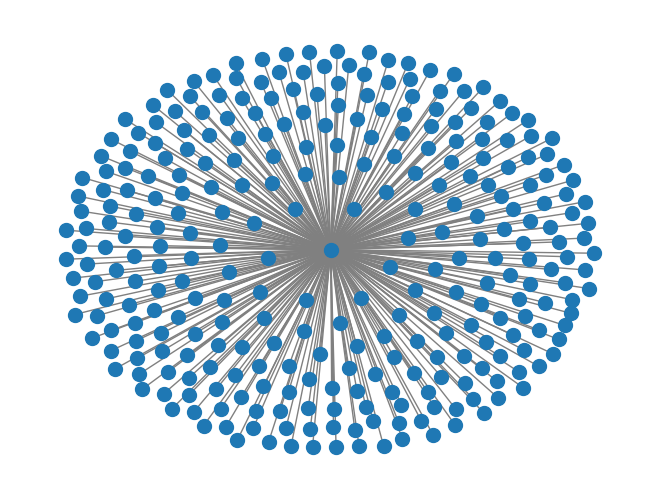

In [138]:
# Draw:
nx.draw(g2,pos=nx.spring_layout(g2, seed=1),node_size=100,edge_color="grey",with_labels = True)

In [120]:
# Output as csv:
dfvhl.to_csv("./vhl.csv")

In [122]:
# number of nodes connected to VHL:
len(dfvhl["ppi"].unique())

296

In [141]:
dfvhl[dfvhl["Type"]=="Binary"].to_csv("./vhl-b.csv")

# Problem 2 Cytoscape (30 pts)

## (Please Upload **2** Images on Canvas and Answer the Following Questions)

### (a) Load output into Cytoscape (10 pts)

First select File, Import, Network From File, then browse to the location of the corresponding output file you generated from previous questions.

Using the column dropdown arrow menus, set the columns:
* "Uniprot_A" to "Source Node"
* "Uniprot_B" to "Target Node"
* "Gene_A", "ORF_A", "Alias_A" to "Source Node Attribute"
* "Gene_B", "ORF_B", "Alias_B" to "Target Node Attribute"

How many nodes and edges you got?

- **297, 302**

### (b) Change Style for Nodes and Edges (10 pts)

* Please change the `Shape` of the Node into `Ellipse`
* Please change the `Stroke Color (unselected)` of the Edge. Make `Co-Complex` and `Binary` into differnt colors (You can choose your favoriate color here)

`Please upload this result image on Canvas`


### (c) Draw Subgraph of Binary Plot (10 pts)

* Please select edges with `Binary` as Type in the Edge Table
* Please generate another network plot.
* Please change the `Label` of node to `Gene_B`. You might found there are empty values, please label those proteins in the Node Table. You can click on the empty node and copy&paste its gene name from `Gene_A` to `Gene_B` in the Node Table.

`Please upload this result image on Canvas`


3.0